In [119]:
import sys
import pandas as pd
 
sys.path.append('../')

from functions import *

df = pd.read_csv("../../data/listings.csv", usecols=["id", "apple", "samsung", "amazon", "others", "sellerFeedbackScore", "isSold", "isPolice", "price"])
df = df[(df.isPolice == 0) & (df.isSold == 1)]

In [143]:
d = pd.read_csv("../../data/demeaned.csv")
d["time"] = pd.to_datetime(d.endtime).astype(int)
d = d.sort_values("time").reset_index(drop=True)
d = d.groupby(["id", "increment_residual"])["residual"].apply(lambda x: x.values).reset_index()

In [111]:
from statsmodels.tsa import stattools

stattools.adfuller(d.increment_residual, regression="ctt")

(-14.913559713227855,
 8.737074518828281e-24,
 2,
 1006,
 {'1%': -4.382684806602406,
  '5%': -3.83827293477557,
  '10%': -3.5569030658394762},
 2592.032267510729)

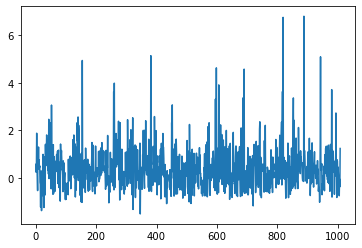

In [93]:
import matplotlib.pyplot as plt

plt.plot(d.increment_residual)

In [2]:
def calculate(row):
    R = row.sellerFeedbackScore
    min_cost_c = max(0.2-0.107*R,0)
    min_cost = max(0.458-0.078*R,0)
    max_cost = max(0.661-0.074*R,0)
    max_cost_c = max(0.76-0.011*R,0)
    
    std = 0
    
    if row.apple == 1:
        std = 298.1
    elif row.samsung == 1:
        std = 47.758
    elif row.amazon == 1:
        std = 17.49
    elif row.others == 1:
        std = 21.31
        
    min_cost_c = min_cost_c*std
    min_cost = min_cost*std
    max_cost = max_cost*std
    max_cost_c = max_cost_c*std
    
    return (min_cost_c, min_cost, max_cost, max_cost_c)

In [3]:
def calculate_h(row):
    R = 0
    min_cost_c = max(0.2-0.107*R,0)
    min_cost = max(0.458-0.078*R,0)
    max_cost = max(0.661-0.074*R,0)
    max_cost_c = max(0.76-0.011*R,0)
    
    std = 0
    
    if row.apple == 1:
        std = 298.1
    elif row.samsung == 1:
        std = 47.758
    elif row.amazon == 1:
        std = 17.49
    elif row.others == 1:
        std = 21.31
        
    min_cost_c = min_cost_c*std
    min_cost = min_cost*std
    max_cost = max_cost*std
    max_cost_c = max_cost_c*std
    
    return (min_cost_c, min_cost, max_cost, max_cost_c)

In [4]:
df2 = df.apply(calculate, axis=1, result_type="expand")
df2.columns = ("min_cost_c", "min_cost", "max_cost", "max_cost_c")

df = pd.concat([df, df2], axis=1)

In [5]:
df3 = df.apply(calculate_h, axis=1, result_type="expand")
df3.columns = ("h_min_cost_c", "h_min_cost", "h_max_cost", "h_max_cost_c")

df = pd.concat([df, df3], axis=1)

In [6]:
apple = df[df.apple == 1]
amazon = df[df.amazon == 1]
samsung = df[df.samsung == 1]
others = df[df.others == 1]

In [7]:
df[["min_cost_c", "min_cost", "max_cost", "max_cost_c", "price"]].sum()*100/df.price.sum()

min_cost_c      0.129712
min_cost        0.655698
max_cost        1.358268
max_cost_c      5.388223
price         100.000000
dtype: float64

In [29]:
others[["h_min_cost_c", "h_min_cost", "h_max_cost", "h_max_cost_c", "price"]].sum()/others.price.sum()

h_min_cost_c    0.115385
h_min_cost      0.264232
h_max_cost      0.381347
h_max_cost_c    0.438463
price           1.000000
dtype: float64

In [9]:
apple[["min_cost_c", "min_cost", "max_cost", "max_cost_c", "price"]].sum()*100/apple.price.sum()

min_cost_c      0.133272
min_cost        0.706168
max_cost        1.489260
max_cost_c      5.704342
price         100.000000
dtype: float64

In [15]:
amazon[["min_cost_c", "min_cost", "max_cost", "max_cost_c", "price"]].sum()*100/amazon.price.sum()

min_cost_c      0.012818
min_cost        0.175865
max_cost        0.411270
max_cost_c      3.023609
price         100.000000
dtype: float64

In [11]:
samsung[["min_cost_c", "min_cost", "max_cost", "max_cost_c", "price"]].sum()*100/samsung.price.sum()

min_cost_c      0.176208
min_cost        0.571322
max_cost        0.925542
max_cost_c      4.486082
price         100.000000
dtype: float64

In [12]:
others[["min_cost_c", "min_cost", "max_cost", "max_cost_c", "price"]].sum()*100/others.price.sum()

min_cost_c      0.187821
min_cost        0.537181
max_cost        0.932695
max_cost_c      3.984627
price         100.000000
dtype: float64